# Which states have the most sightings over time?


In [2]:
import os
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
ufo_df = pd.read_csv('resources/ufo4.csv', low_memory=False)
pop_df = pd.read_csv('resources/apportionment.csv')

In [4]:
df_us = ufo_df[ufo_df['country'] == 'us']
df_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region
0,5/5/2014 16:00,anchorage,ak,us,NaN,10800,3+ hours,UFO hiding in moving mist/cloud over Cook Inlet.,5/8/2014,61.2180556,-149.900278,West
1,4/19/2014 22:15,anchorage,ak,us,flash,300,3-5 minutes,Brightly flashing high speed spherical object ...,4/24/2014,61.2180556,-149.900278,West
2,4/19/2014 0:04,kodiak,ak,us,sphere,60,1 minute,Red light over Kodiak.,4/24/2014,57.79,-152.407222,West
3,4/14/2014 22:45,wasilla,ak,us,triangle,60,1 minute,3 red-orange lights on low flying UFO(s) off P...,4/18/2014,61.5813889,-149.439444,West
4,4/11/2014 21:30,ketchikan,ak,us,fireball,120,2 minutes,Fireball like object seen above the small isla...,4/18/2014,55.3422222,-131.646111,West


In [5]:
state_count = df_us['state'].value_counts()
state_count

ca    9584
wa    4240
fl    4175
tx    3638
ny    3195
az    2667
il    2628
pa    2567
oh    2401
mi    2059
nc    1858
or    1826
mo    1565
nj    1499
co    1494
va    1382
in    1380
ma    1342
ga    1339
wi    1320
tn    1189
mn    1073
sc    1069
ct     959
md     906
ky     903
nv     899
nm     805
ok     758
ut     739
ia     702
al     687
ar     656
ks     649
me     628
la     590
id     552
nh     535
mt     505
wv     484
ms     408
ne     402
hi     349
ak     345
vt     306
ri     287
wy     203
sd     193
de     183
nd     138
Name: state, dtype: int64

Text(0.5, 1.0, 'UFO Sightings per State, 1950-2015')

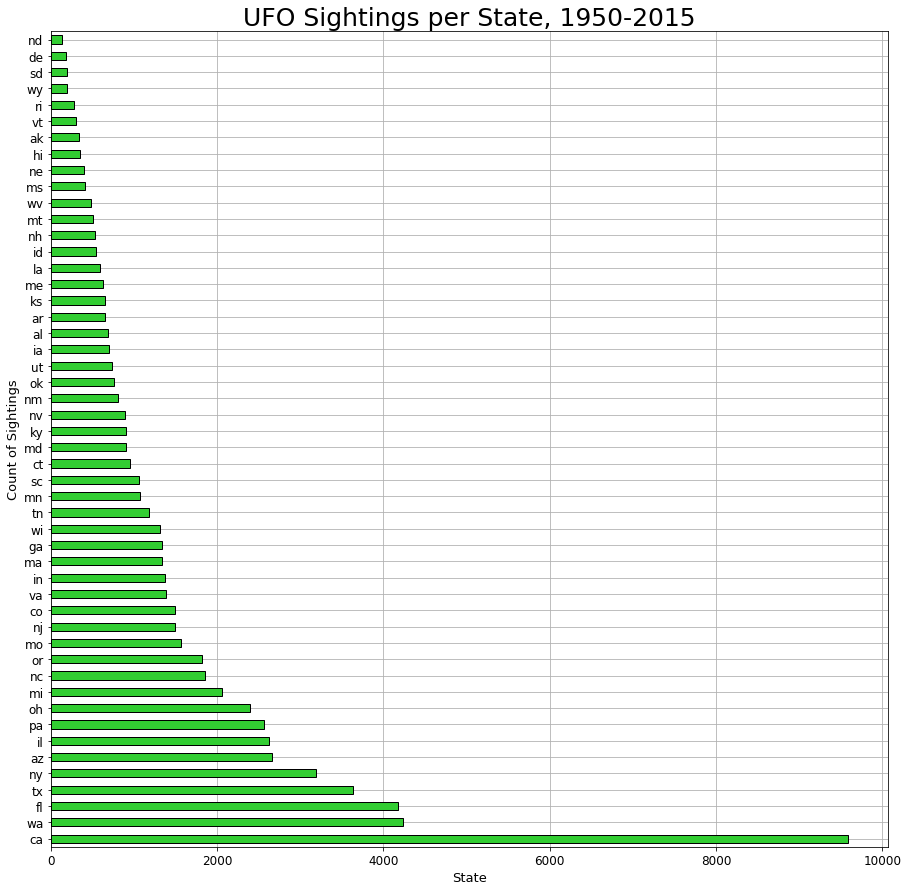

In [6]:

plot_pandas = state_count.plot.barh(color='limegreen',ec='black',figsize=(15,15),legend=False,zorder=5, grid=True)
plt.xticks(rotation=0, size=12)
plt.yticks(rotation=0, size=12)
plt.xlabel("State", size=13)
plt.ylabel("Count of Sightings", size=13)
plt.title("UFO Sightings per State, 1950-2015", size=25)


In [7]:
state_count_top5 = df_us['state'].value_counts().head(5)
state_count_top5



ca    9584
wa    4240
fl    4175
tx    3638
ny    3195
Name: state, dtype: int64

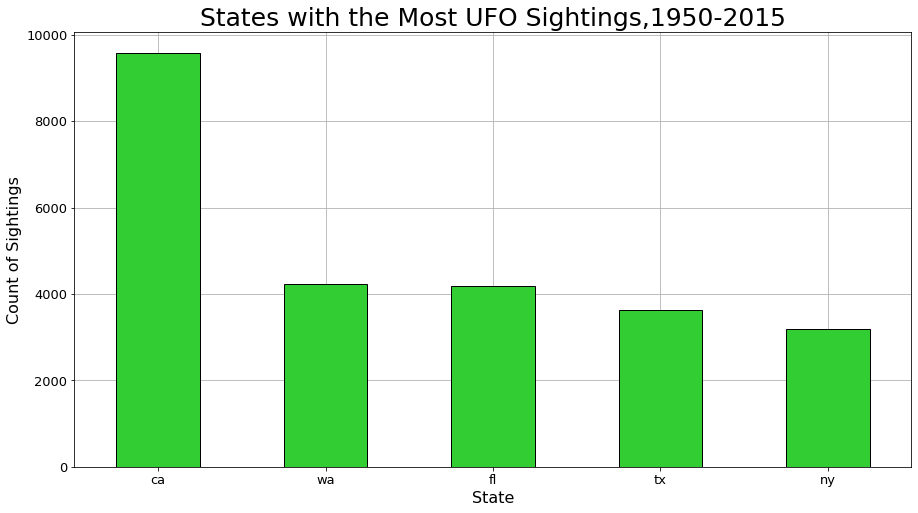

<Figure size 432x288 with 0 Axes>

In [55]:
plot_pandas = state_count_top5.plot.bar(color="limegreen",ec="black",figsize=(15,8),legend=False,zorder=5, grid=True)
plt.xticks(rotation=0, size=13)
plt.yticks(rotation=0, size=13)
plt.xlabel("State", size=16)
plt.ylabel("Count of Sightings", size=16)
plt.title("States with the Most UFO Sightings,1950-2015", size=25)
fig = plt.figure()


In [56]:
state_count_bottom5 = state_count.tail(5)
state_count_bottom5

ri    287
wy    203
sd    193
de    183
nd    138
Name: state, dtype: int64

Text(0.5, 1.0, 'States with the Fewest UFO Sightings,1950-2015')

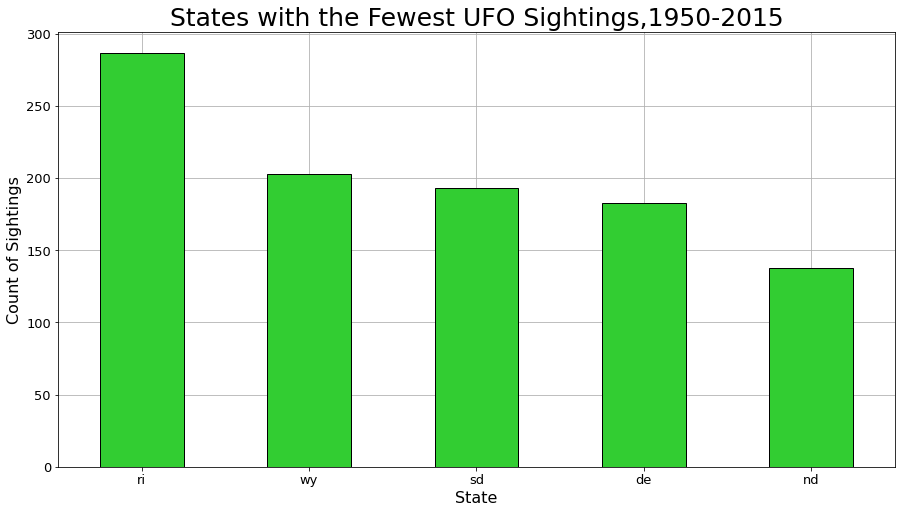

In [57]:
plot_pandas = state_count_bottom5.plot.bar(color="limegreen",ec="black",figsize=(15,8),legend=False,zorder=5, grid=True)
plt.xticks(rotation=0, size=13)
plt.yticks(rotation=0, size=13)
plt.xlabel("State", size=16)
plt.ylabel("Count of Sightings", size=16)
plt.title("States with the Fewest UFO Sightings,1950-2015", size=25)

In [73]:
states = {
        'ak': 'Alaska',
        'al': 'Alabama',
        'ar': 'Arkansas',
        'as': 'American Samoa',
        'az': 'Arizona',
        'ca': 'California',
        'co': 'Colorado',
        'ct': 'Connecticut',
        'dc': 'District of Columbia',
        'de': 'Delaware',
        'fl': 'Florida',
        'ga': 'Georgia',
        'gu': 'Guam',
        'hi': 'Hawaii',
        'ia': 'Iowa',
        'id': 'Idaho',
        'il': 'Illinois',
        'in': 'Indiana',
        'ks': 'Kansas',
        'ky': 'Kentucky',
        'la': 'Louisiana',
        'ma': 'Massachusetts',
        'md': 'Maryland',
        'me': 'Maine',
        'mi': 'Michigan',
        'mn': 'Minnesota',
        'mo': 'Missouri',
        'mp': 'Northern Mariana Islands',
        'ms': 'Mississippi',
        'mt': 'Montana',
        'na': 'National',
        'nc': 'North Carolina',
        'nd': 'North Dakota',
        'ne': 'Nebraska',
        'nh': 'New Hampshire',
        'nj': 'New Jersey',
        'nm': 'New Mexico',
        'nv': 'Nevada',
        'ny': 'New York',
        'oh': 'Ohio',
        'ok': 'Oklahoma',
        'or': 'Oregon',
        'pa': 'Pennsylvania',
        'pr': 'Puerto Rico',
        'ri': 'Rhode Island',
        'sc': 'South Carolina',
        'sd': 'South Dakota',
        'tn': 'Tennessee',
        'tx': 'Texas',
        'ut': 'Utah',
        'va': 'Virginia',
        'vi': 'Virgin Islands',
        'vt': 'Vermont',
        'wa': 'Washington',
        'wi': 'Wisconsin',
        'wv': 'West Virginia',
        'wy': 'Wyoming'
}

In [74]:
ufo_df = pd.read_csv('resources/ufo4.csv', low_memory=False)
pop_df = pd.read_csv('resources/apportionment.csv')

In [75]:
pop_df.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,"2,138,093",16.9,42.2,25.0,10.0,1.0,"213,809"
1,Alaska,State,1910,"64,356",1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,"204,354",66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,"1,574,449",20.0,30.3,30.0,7.0,0.0,"224,921"
4,California,State,1910,"2,377,549",60.1,15.3,38.0,11.0,3.0,"216,051"


In [76]:
pop_df.drop(['Geography Type', 
             'Percent Change in Resident Population', 
             'Resident Population Density', 
             'Resident Population Density Rank', 
             'Number of Representatives', 
             'Change in Number of Representatives', 
             'Average Apportionment Population Per Representative'], axis=1, inplace=True)
pop_df.head()

,Name,Year,Resident Population
0,Alabama,1910,"2,138,093"
1,Alaska,1910,"64,356"
2,Arizona,1910,"204,354"
3,Arkansas,1910,"1,574,449"
4,California,1910,"2,377,549"
